In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing data
df = pd.read_csv('Calls Data weekly.csv')
#Printing head
print(df.head())
print(df.tail())
print(df.shape)

         date   Calls
0  2017-06-05  156765
1  2017-06-12  132625
2  2017-06-19  122338
3  2017-06-26  121952
4  2017-07-03  148708
           date   Calls
118  2019-09-02  118753
119  2019-09-09  166199
120  2019-09-16  154386
121  2019-09-23  130366
122  2019-09-30  120030
(123, 2)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 2 columns):
date     123 non-null object
Calls    123 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.5+ KB


In [4]:
#Checking for duplicates in date column
df[df.date.duplicated()]

date   Calls
84  2019-01-07  124460

In [5]:
#As there is same date(2019-01-07) at index 83 and 84 the calls value was added and made it into a single row of date 2019-01-07
print('Before Handling of duplicate calls:')
print(df.loc[83])
print(df.loc[84])

df.loc[83,'Calls'] = df.loc[83,'Calls'] + df.loc[84, 'Calls']

print('After Handling of duplicate calls:')
print(df.loc[83])
print(df.loc[84])

Before Handling of duplicate calls:
date     2019-01-07
Calls         40224
Name: 83, dtype: object
date     2019-01-07
Calls        124460
Name: 84, dtype: object
After Handling of duplicate calls:
date     2019-01-07
Calls        164684
Name: 83, dtype: object
date     2019-01-07
Calls        124460
Name: 84, dtype: object


In [6]:
df.drop([84], inplace=True)

In [7]:
print(df.loc[83])
print(df.loc[85])

print(df[df.date.duplicated()])

df = df.reset_index()
df.drop(['index'], axis = 1, inplace = True)

print(df)
print(df.loc[83])
print(df.loc[84])

date     2019-01-07
Calls        164684
Name: 83, dtype: object
date     2019-01-14
Calls        181634
Name: 85, dtype: object
Empty DataFrame
Columns: [date, Calls]
Index: []
           date   Calls
0    2017-06-05  156765
1    2017-06-12  132625
2    2017-06-19  122338
3    2017-06-26  121952
4    2017-07-03  148708
5    2017-07-10  135102
6    2017-07-17  134510
7    2017-07-24  134445
8    2017-07-31  144790
9    2017-08-07  145117
10   2017-08-14  126319
11   2017-08-21  120820
12   2017-08-28  133168
13   2017-09-04  146626
14   2017-09-11  129373
15   2017-09-18  119028
16   2017-09-25  113252
17   2017-10-02  134888
18   2017-10-09  135165
19   2017-10-16  117651
20   2017-10-23  109801
21   2017-10-30  142869
22   2017-11-06  120321
23   2017-11-13  112299
24   2017-11-20  111321
25   2017-11-27  118334
26   2017-12-04  131446
27   2017-12-11  106275
28   2017-12-18  107541
29   2017-12-25   97474
..          ...     ...
92   2019-03-11  164172
93   2019-03-18  150979
94   20

In [8]:
#Converting date column into datetime format
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 122 entries, 2017-06-05 to 2019-09-30
Data columns (total 1 columns):
Calls    122 non-null int64
dtypes: int64(1)
memory usage: 1.9 KB


In [9]:
df

Calls
date              
2017-06-05  156765
2017-06-12  132625
2017-06-19  122338
2017-06-26  121952
2017-07-03  148708
2017-07-10  135102
2017-07-17  134510
2017-07-24  134445
2017-07-31  144790
2017-08-07  145117
2017-08-14  126319
2017-08-21  120820
2017-08-28  133168
2017-09-04  146626
2017-09-11  129373
2017-09-18  119028
2017-09-25  113252
2017-10-02  134888
2017-10-09  135165
2017-10-16  117651
2017-10-23  109801
2017-10-30  142869
2017-11-06  120321
2017-11-13  112299
2017-11-20  111321
2017-11-27  118334
2017-12-04  131446
2017-12-11  106275
2017-12-18  107541
2017-12-25   97474
...            ...
2019-03-11  164172
2019-03-18  150979
2019-03-25  116520
2019-04-01  110371
2019-04-08  154346
2019-04-15  148015
2019-04-22  120240
2019-04-29  115065
2019-05-06  141962
2019-05-13  160082
2019-05-20  134077
2019-05-27  119622
2019-06-03  131017
2019-06-10  169332
2019-06-17  169905
2019-06-24  137161
2019-07-01  128541
2019-07-08  177048
2019-07-15  159667
2019-07-22  126763
2019-07-29  116165
2019-08-05  143044
2019-08-12  193092
2019-08-19  141962
2019-08-26  132027
2019-09-02  118753
2019-09-09  166199
2019-09-16  154386
2019-09-23  130366
2019-09-30  120030

[122 rows x 1 columns]

In [10]:
#Creating train and test set 
#Index 114 marks the end of train set and last 8 weeks are in test set which are to be forecasted for
train=df[0:114] 
test=df[114:]
print(train.head())
print(test)

             Calls
date              
2017-06-05  156765
2017-06-12  132625
2017-06-19  122338
2017-06-26  121952
2017-07-03  148708
             Calls
date              
2019-08-12  193092
2019-08-19  141962
2019-08-26  132027
2019-09-02  118753
2019-09-09  166199
2019-09-16  154386
2019-09-23  130366
2019-09-30  120030


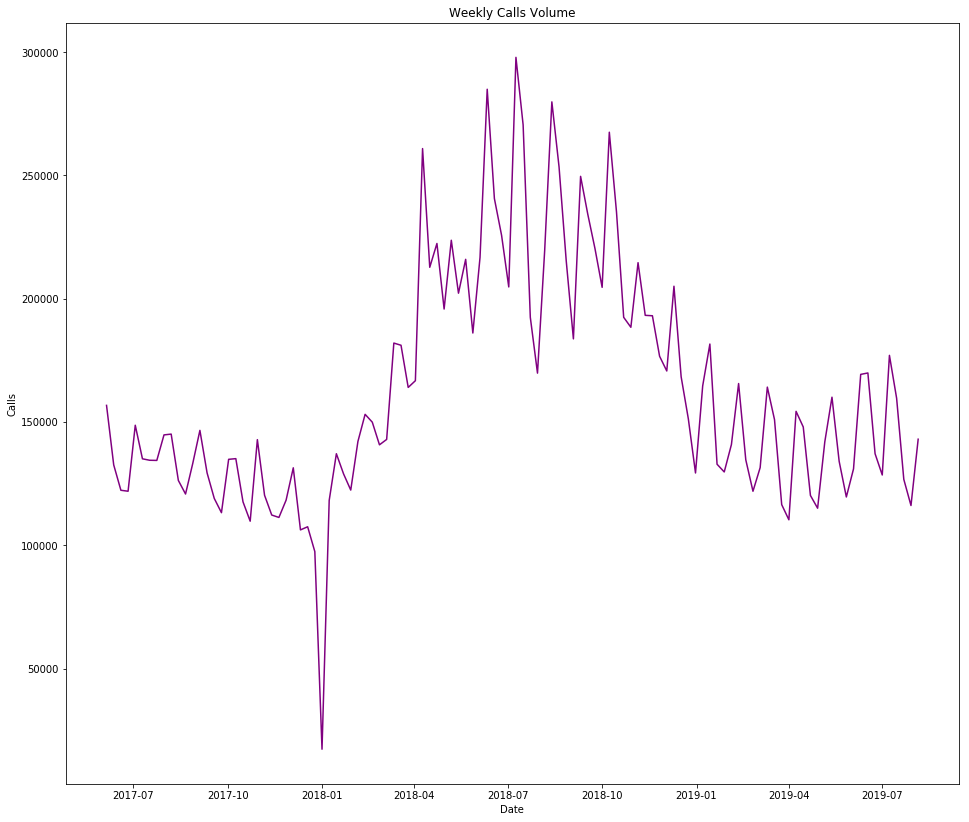

<Figure size 432x288 with 0 Axes>

In [11]:
#Plotting the time series graph
fig, ax = plt.subplots(figsize=(16, 14))

# Add the x-axis and the y-axis to the plot
ax.plot(train.index.values,
        train['Calls'],
        color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Calls",
       title="Weekly Calls Volume")

plt.show()
plt.savefig('time-series.png')

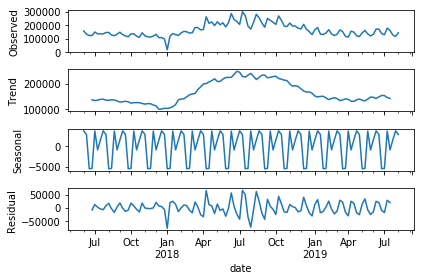

In [12]:
#Plotting the time series dataset's Trend, Seasonal and Residual Components
import statsmodels.api as sm
sm.tsa.seasonal_decompose(train.Calls, freq = 7).plot()
result = sm.tsa.stattools.adfuller(train.Calls)
plt.show()

## **HOLT'S LINEAR TREND METHOD**

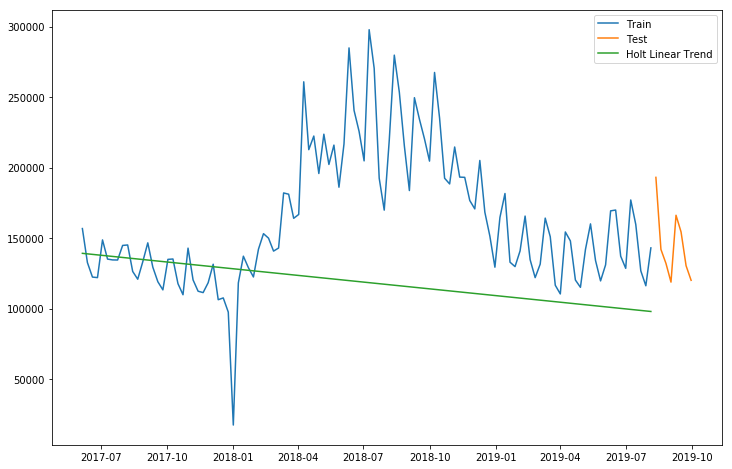

In [15]:
#Forecasting on train dataset
y_hat_avg_hlt = train.copy()
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
fit3 = Holt(np.asarray(train['Calls'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat_avg_hlt['HLT'] = fit3.forecast(len(train))

plt.figure(figsize=(12,8))
plt.plot(train['Calls'], label='Train')
plt.plot(test['Calls'], label='Test')
plt.plot(y_hat_avg_hlt['HLT'], label='Holt Linear Trend')
plt.legend(loc='best')
plt.show()

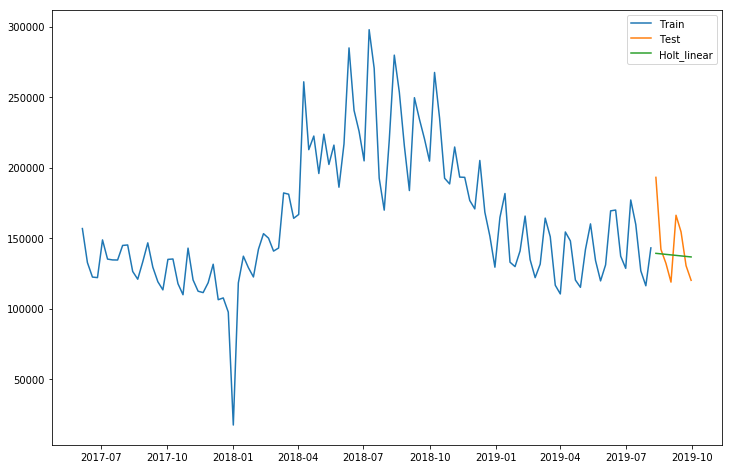

In [16]:
#Forecastong on test dataset
y_hat_avg_hlm = test.copy()
y_hat_avg_hlm['Holt_linear'] = fit3.forecast(len(test))

plt.figure(figsize=(12,8))
plt.plot(train['Calls'], label='Train')
plt.plot(test['Calls'], label='Test')
plt.plot(y_hat_avg_hlm['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

In [18]:
from sklearn.metrics import mean_squared_error
from math import sqrt
#Compute RMSE of train dataset
rms_hlt_train = sqrt(mean_squared_error(train, y_hat_avg_hlt.HLT))
print('RMSE with Holt Linear Trend on train dataset: ',rms_hlt_train)

#Compute RMSE of test dataset
rms_hlt_test = sqrt(mean_squared_error(test, y_hat_avg_hlm.Holt_linear))
print('RMSE with Holt Linear Trend on test dataset : ',rms_hlt_test)
print('\n')

#MAPE of train dataset
mape_train = np.mean(np.abs(y_hat_avg_hlt.HLT - y_hat_avg_hlt.Calls)/np.abs(y_hat_avg_hlt.Calls)*100)
print('MAPE of train dataset is:',mape_train)
print('Accuracy of Holt Linear Trend  on original train dataset is:',np.round((100 - mape_train),2))
print('\n')

#MAPE of test dataset
mape_test = np.mean(np.abs(y_hat_avg_hlm.Holt_linear - y_hat_avg_hlm.Calls)/np.abs(y_hat_avg_hlm.Calls)*100)  
print('MAPE of test dataset is:',mape_test)
print('Accuracy of Holt Linear Trend method on original test dataset is:',np.round((100 - mape_test),2))

RMSE with Holt Linear Trend on train dataset:  67207.76835088956
RMSE with Holt Linear Trend on test dataset :  24372.45473549936


MAPE of train dataset is: 32.19611576438314
Accuracy of Holt Linear Trend  on original train dataset is: 67.8


MAPE of test dataset is: 12.29400468567126
Accuracy of Holt Linear Trend method on original test dataset is: 87.71


In [19]:
print('Forecasted values by Holt Linear Trend Method:')
print(y_hat_avg_hlm)

Forecasted values by Holt Linear Trend Method:
             Calls    Holt_linear
date                             
2019-08-12  193092  139176.580233
2019-08-19  141962  138811.527666
2019-08-26  132027  138446.475100
2019-09-02  118753  138081.422534
2019-09-09  166199  137716.369968
2019-09-16  154386  137351.317402
2019-09-23  130366  136986.264836
2019-09-30  120030  136621.212270
